In [1]:
import pandas as pd

df = pd.read_excel("traveloka/kategori.xlsx")
df.head()


,sentiment,kategori,review,tanggal,batch
0,negatif,transportasi,jika ada komplain tidak ditanggapi dengan baik...,2025-05-15 09:01:14,1
1,negatif,pengalaman pengguna dan aplikasi,tampilan beranda dan lainlain tampak seperti d...,2025-04-30 16:39:20,1
2,negatif,pengalaman pengguna dan aplikasi,etiket tidak segera dikirim juga menyalahkan p...,2025-05-02 22:44:36,1
3,positif,pengalaman pengguna dan aplikasi,saya suka sekali pesan hotel atraksi sampai ti...,2025-04-10 05:59:26,1
4,negatif,promo dan diskon,ternyata ada jebakan di aplikasi ini kejadiann...,2025-05-01 11:39:38,1


In [2]:
from sklearn.preprocessing import LabelEncoder

label_encoder_kategori = LabelEncoder()
label_encoder_sentimen = LabelEncoder()

df['kategori'] = label_encoder_kategori.fit_transform(df['kategori'])
df['sentiment'] = label_encoder_sentimen.fit_transform(df['sentiment'])

df.head()


,sentiment,kategori,review,tanggal,batch
0,0,6,jika ada komplain tidak ditanggapi dengan baik...,2025-05-15 09:01:14,1
1,0,3,tampilan beranda dan lainlain tampak seperti d...,2025-04-30 16:39:20,1
2,0,3,etiket tidak segera dikirim juga menyalahkan p...,2025-05-02 22:44:36,1
3,1,3,saya suka sekali pesan hotel atraksi sampai ti...,2025-04-10 05:59:26,1
4,0,4,ternyata ada jebakan di aplikasi ini kejadiann...,2025-05-01 11:39:38,1


In [3]:
# Menghitung jumlah masing-masing label encoded
sentiment_counts_encoded = df['sentiment'].value_counts().sort_index()

# Mengembalikan label aslinya menggunakan inverse_transform
sentiment_labels = label_encoder_sentimen.inverse_transform(sentiment_counts_encoded.index)

# Membuat DataFrame hasilnya
sentiment_counts = pd.DataFrame({
    'Sentimen': sentiment_labels,
    'Jumlah': sentiment_counts_encoded.values
})

print(sentiment_counts)


  Sentimen  Jumlah
0  negatif     717
1  positif     282


In [4]:
df['kategori_label'] = label_encoder_kategori.inverse_transform(df['kategori'])
df['sentiment_label'] = label_encoder_sentimen.inverse_transform(df['sentiment'])

pd.crosstab(df['kategori_label'], df['sentiment_label'])


sentiment_label,negatif,positif
kategori_label,,
hotel dan penginapan,71,15
lainnya,16,11
layanan dan customer service,55,20
pengalaman pengguna dan aplikasi,170,151
promo dan diskon,14,13
refund dan pembayaran,309,50
transportasi,82,22


In [5]:
import os
import pickle

# # Pastikan folder tujuan ada, kalau belum ada maka buat dulu
# os.makedirs('traveloka', exist_ok=True)

# Simpan LabelEncoder kategori
with open('traveloka/label_encoder_kategori.pkl', 'wb') as file:
    pickle.dump(label_encoder_kategori, file)

# Simpan LabelEncoder sentiment
with open('traveloka/label_encoder_sentimen.pkl', 'wb') as file:
    pickle.dump(label_encoder_sentimen, file)

print("LabelEncoder berhasil disimpan dalam folder")


LabelEncoder berhasil disimpan dalam folder


In [6]:
# Load LabelEncoder dari file
with open('traveloka/label_encoder_kategori.pkl', 'rb') as file:
    label_encoder_kategori = pickle.load(file)

with open('traveloka/label_encoder_sentimen.pkl', 'rb') as file:
    label_encoder_sentimen = pickle.load(file)

# Tampilkan mapping dalam LabelEncoder
print("Mapping Sentiment:")
for idx, label in enumerate(label_encoder_sentimen.classes_):
    print(f"{idx}: {label}")

print("\nMapping Kategori:")
for idx, label in enumerate(label_encoder_kategori.classes_):
    print(f"{idx}: {label}")


Mapping Sentiment:
0: negatif
1: positif

Mapping Kategori:
0: hotel dan penginapan
1: lainnya
2: layanan dan customer service
3: pengalaman pengguna dan aplikasi
4: promo dan diskon
5: refund dan pembayaran
6: transportasi


###### Split Data

In [7]:
from sklearn.model_selection import train_test_split

X = df['review'].values
y = df[['sentiment', 'kategori']].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Cek hasil split
print("Fitur Latih (X_train):", X_train.shape)
print("Fitur Uji (X_test):", X_test.shape)
print("Target Latih (y_train):", y_train.shape)
print("Target Uji (y_test):", y_test.shape)

# Simpan data
train_data = pd.DataFrame({'review': X_train, 'sentiment': y_train[:, 0], 'kategori': y_train[:, 1]})
train_data.to_excel('traveloka/train_data.xlsx', index=False)

test_data = pd.DataFrame({'review': X_test, 'sentiment': y_test[:, 0], 'kategori': y_test[:, 1]})
test_data.to_excel('traveloka/test_data.xlsx', index=False)

Fitur Latih (X_train): (799,)
Fitur Uji (X_test): (200,)
Target Latih (y_train): (799, 2)
Target Uji (y_test): (200, 2)


###### Model

Loading data...
Loading FastText model...
FastText model loaded successfully!


c:\Users\ratri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 527ms/step - accuracy: 0.7010 - loss: 0.6380
Epoch 1: val_accuracy improved from -inf to 0.65000, saving model to best_bilstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 34s 631ms/step - accuracy: 0.7019 - loss: 0.6366 - val_accuracy: 0.6500 - val_loss: 0.6020
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 484ms/step - accuracy: 0.7507 - loss: 0.5261
Epoch 2: val_accuracy improved from 0.65000 to 0.84500, saving model to best_bilstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 512ms/step - accuracy: 0.7508 - loss: 0.5250 - val_accuracy: 0.8450 - val_loss: 0.4284
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.8707 - loss: 0.3235
Epoch 3: val_accuracy improved from 0.84500 to 0.85000, saving model to best_bilstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 525ms/step - accuracy: 0.8715 - loss: 0.3221 - val_accuracy: 0.8500 - val_loss: 0.4852
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 507ms/step - accuracy: 0.9418 - loss: 0.2138
Epoch 4: val_accuracy improved from 0.85000 to 0.88500, saving model to best_bilstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 536ms/step - accuracy: 0.9423 - loss: 0.2123 - val_accuracy: 0.8850 - val_loss: 0.4356
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 485ms/step - accuracy: 0.9733 - loss: 0.0940
Epoch 5: val_accuracy did not improve from 0.88500
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 508ms/step - accuracy: 0.9733 - loss: 0.0942 - val_accuracy: 0.8850 - val_loss: 0.4005
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 503ms/step - accuracy: 0.9897 - loss: 0.0559
Epoch 6: val_accuracy improved from 0.88500 to 0.90000, saving model to best_bilstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 532ms/step - accuracy: 0.9896 - loss: 0.0560 - val_accuracy: 0.9000 - val_loss: 0.5847
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 496ms/step - accuracy: 0.9914 - loss: 0.0405
Epoch 7: val_accuracy did not improve from 0.90000
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 521ms/step - accuracy: 0.9914 - loss: 0.0406 - val_accuracy: 0.8800 - val_loss: 0.7088
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 486ms/step - accuracy: 0.9792 - loss: 0.0823
Epoch 8: val_accuracy did not improve from 0.90000
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 510ms/step - accuracy: 0.9794 - loss: 0.0809 - val_accuracy: 0.8750 - val_loss: 0.7027
Epoch 9/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 487ms/step - accuracy: 0.9951 - loss: 0.0262
Epoch 9: val_accuracy did not improve from 0.90000
25/25 ━━━━━━━━━━━━━━━━━━━━ 13s 511ms/step - accuracy: 0.9951 - loss: 0.0263 - val_accuracy: 0.8900 - val_loss: 0.6391
Epoch 10/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 491ms/step - accuracy: 0.9971 - loss: 0.0105
Epoch 10: val_accuracy did not

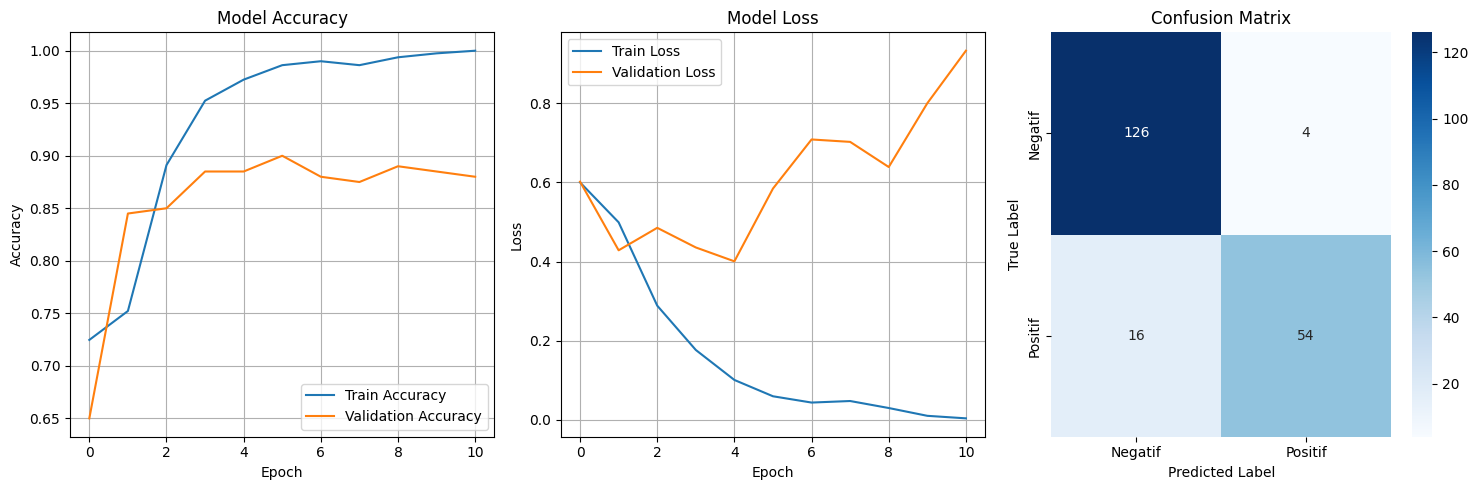

Saving model and tokenizer...
Training completed successfully!
Model saved as: bilstm_sentiment_model.h5
Tokenizer saved as: tokenizer.pickle
Config saved as: model_config.pickle


In [8]:
## Model Bi-LSTM

import pandas as pd
import numpy as np
import re
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Bidirectional, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import gensim.downloader as api
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pickle

# 1. Load data training dan testing
print("Loading data...")
train_data = pd.read_excel('traveloka/train_data.xlsx')
test_data = pd.read_excel('traveloka/test_data.xlsx')

# 2. Preprocessing teks
def preprocess_text(text):
    """Preprocessing teks untuk membersihkan data"""
    if pd.isna(text):
        return ""
    text = str(text).lower() #lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) #remove url
    text = re.sub(r'\S+@\S+', '', text) #remove email
    text = re.sub(r'[^a-zA-Z\s]', ' ', text) #remove special characters
    text = re.sub(r'\s+', ' ', text) #remove extra whitespaces
    text = text.strip() #remove leading/trailing whitespaces
    return text

train_data['review_clean'] = train_data['review'].apply(preprocess_text)
test_data['review_clean'] = test_data['review'].apply(preprocess_text)

# Remove empty reviews
train_data = train_data[train_data['review_clean'].str.len() > 0]
test_data = test_data[test_data['review_clean'].str.len() > 0]

# 3. Tokenization dan Sequence Processing
all_texts = list(train_data['review_clean']) + list(test_data['review_clean']) #Buat vocab

# Set parameter untuk tokenizer
MAX_VOCAB_SIZE = 20000
MAX_SEQUENCE_LENGTH = 100
OOV_TOKEN = "<OOV>"

# Buat tokenizer
tokenizer = Tokenizer(
    num_words=MAX_VOCAB_SIZE,
    oov_token=OOV_TOKEN,
    lower=True
)
tokenizer.fit_on_texts(all_texts)

# Convert text ke sequences
X_train_seq = tokenizer.texts_to_sequences(train_data['review_clean'])
X_test_seq = tokenizer.texts_to_sequences(test_data['review_clean'])

# Padding sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

# 4. Load FastText Pre-trained Model
print("Loading FastText model...")
try:
    # Download FastText 
    fasttext_model = api.load('fasttext-wiki-news-subwords-300')
    EMBEDDING_DIM = 300
    print("FastText model loaded successfully!")
except Exception as e:
    print(f"Error loading FastText: {e}")
    print("Using random embedding instead...")
    fasttext_model = None
    EMBEDDING_DIM = 100

# 5. Create Embedding Matrix
word_index = tokenizer.word_index
vocab_size = min(len(word_index) + 1, MAX_VOCAB_SIZE)

# Initialize 
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))

if fasttext_model is not None:
    # embedding matrix with FastText vectors
    found_words = 0
    for word, idx in word_index.items():
        if idx >= MAX_VOCAB_SIZE:
            continue
        try:
            embedding_vector = fasttext_model[word]
            embedding_matrix[idx] = embedding_vector
            found_words += 1
        except KeyError:
            pass
else:
    # Random initialization jika fastext tidak berhasil diunduh
    embedding_matrix = np.random.uniform(-0.25, 0.25, (vocab_size, EMBEDDING_DIM))

# 6. Prepare labels
y_train = train_data['sentiment'].values
y_test = test_data['sentiment'].values

# 7. Build Bi-LSTM model
model = Sequential([
    Embedding(
        input_dim=vocab_size,
        output_dim=EMBEDDING_DIM,
        weights=[embedding_matrix],
        input_length=MAX_SEQUENCE_LENGTH,
        trainable=True,  # Fine-tune embeddings
        name='embedding'
    ),
    
    # Spatial dropout untuk regularization
    SpatialDropout1D(0.2),
    
    # Bidirectional LSTM layers
    Bidirectional(LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3)),
    Bidirectional(LSTM(64, dropout=0.3, recurrent_dropout=0.3)),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    
    # Output layer untuk binary classification
    Dense(1, activation='sigmoid') # Positif dan Negatif
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 8. Setup callbacks
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ModelCheckpoint(
        'best_bilstm_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# 9. Train model
BATCH_SIZE = 32
EPOCHS = 50

history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)

# 10. Evaluate model
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
target_names = ['Negatif', 'Positif']
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 11. Plot training history
plt.figure(figsize=(15, 5))

# Plot accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot confusion matrix
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# 12. Save model dan tokenizer
print("Saving model and tokenizer...")
model.save('bilstm_sentiment_model.h5')

# Save tokenizer
with open('tokenizer.pickle', 'wb') as f:
    pickle.dump(tokenizer, f, protocol=pickle.HIGHEST_PROTOCOL)

# Save model configuration
model_config = {
    'max_sequence_length': MAX_SEQUENCE_LENGTH,
    'vocab_size': vocab_size,
    'embedding_dim': EMBEDDING_DIM,
    'sentiment_mapping': {0: 'negatif', 1: 'positif'}
}

with open('model_config.pickle', 'wb') as f:
    pickle.dump(model_config, f, protocol=pickle.HIGHEST_PROTOCOL)

print("Training completed successfully!")
print(f"Model saved as: bilstm_sentiment_model.h5")
print(f"Tokenizer saved as: tokenizer.pickle")
print(f"Config saved as: model_config.pickle")

FastText model loaded successfully!
Epoch 1/50


c:\Users\ratri\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step - accuracy: 0.6169 - loss: 0.6652
Epoch 1: val_accuracy improved from -inf to 0.65000, saving model to best_lstm_model.h5


25/25 ━━━━━━━━━━━━━━━━━━━━ 14s 243ms/step - accuracy: 0.6199 - loss: 0.6636 - val_accuracy: 0.6500 - val_loss: 0.7153
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 189ms/step - accuracy: 0.7369 - loss: 0.5833
Epoch 2: val_accuracy did not improve from 0.65000
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 204ms/step - accuracy: 0.7366 - loss: 0.5840 - val_accuracy: 0.6500 - val_loss: 0.6599
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 195ms/step - accuracy: 0.7369 - loss: 0.6024
Epoch 3: val_accuracy did not improve from 0.65000
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 209ms/step - accuracy: 0.7367 - loss: 0.6028 - val_accuracy: 0.6500 - val_loss: 0.6523
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 197ms/step - accuracy: 0.7548 - loss: 0.5786
Epoch 4: val_accuracy did not improve from 0.65000
25/25 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - accuracy: 0.7541 - loss: 0.5795 - val_accuracy: 0.6500 - val_loss: 0.6475
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 194ms/step - accuracy: 0.7427 - loss: 0.5895
Epoch 5: val_accuracy did not impr

c:\Users\ratri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ratri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ratri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

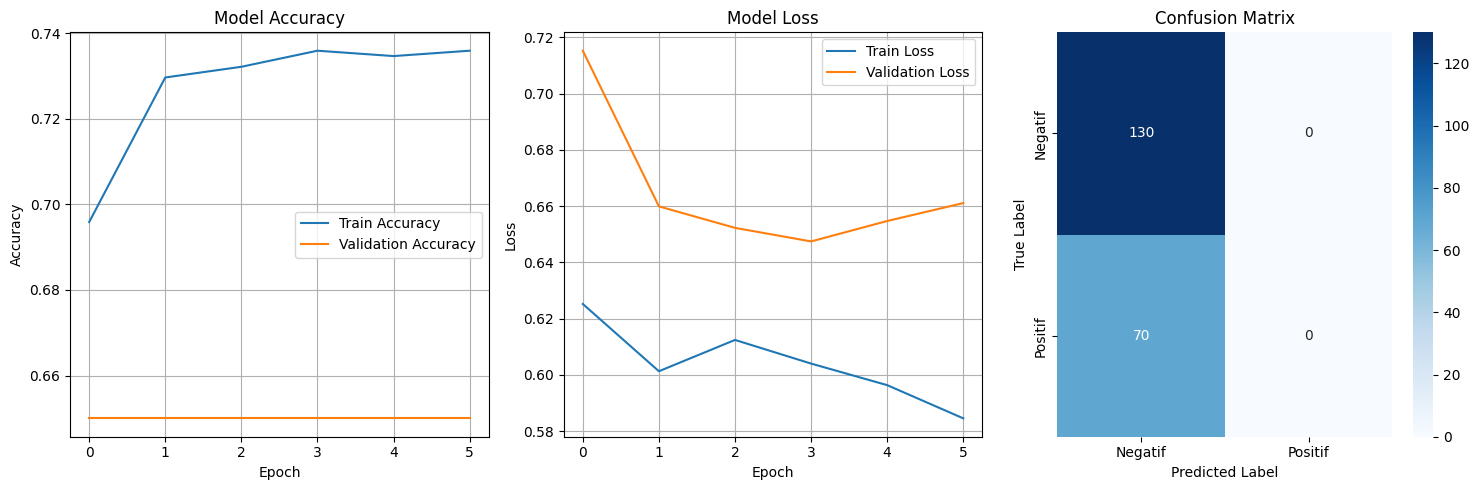

Training completed successfully!
Model saved as: lstm_sentiment_model.h5
Tokenizer saved as: lstm_tokenizer.pickle
Config saved as: lstm_model_config.pickle


In [9]:
## Model LSTM

import pandas as pd
import numpy as np
import re
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout, SpatialDropout1D
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
import gensim.downloader as api
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import pickle

# 1. Load data training dan testing
train_data = pd.read_excel('traveloka/train_data.xlsx')
test_data = pd.read_excel('traveloka/test_data.xlsx')

# 2. Preprocessing teks
def preprocess_text(text):
    """Preprocessing teks untuk membersihkan data"""
    if pd.isna(text):
        return ""
    text = str(text).lower() #lowercase
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE) #remove url
    text = re.sub(r'\S+@\S+', '', text) #remove email
    text = re.sub(r'[^a-zA-Z\s]', ' ', text) #remove special characters
    text = re.sub(r'\s+', ' ', text) #remove extra spaces
    text = text.strip() #remove leading/trailing spaces
    return text

train_data['review_clean'] = train_data['review'].apply(preprocess_text)
test_data['review_clean'] = test_data['review'].apply(preprocess_text)

# Remove empty reviews
train_data = train_data[train_data['review_clean'].str.len() > 0]
test_data = test_data[test_data['review_clean'].str.len() > 0]

# 3. Tokenization dan Sequence Processing
all_texts = list(train_data['review_clean']) + list(test_data['review_clean']) #Buat vocab

# Set parameter untuk tokenizer
MAX_VOCAB_SIZE = 20000
MAX_SEQUENCE_LENGTH = 100
OOV_TOKEN = "<OOV>"

# Buat tokenizer
tokenizer = Tokenizer(
    num_words=MAX_VOCAB_SIZE,
    oov_token=OOV_TOKEN,
    lower=True
)

tokenizer.fit_on_texts(all_texts)

# Convert text ke sequences
X_train_seq = tokenizer.texts_to_sequences(train_data['review_clean'])
X_test_seq = tokenizer.texts_to_sequences(test_data['review_clean'])

# Padding sequences
X_train_pad = pad_sequences(X_train_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')
X_test_pad = pad_sequences(X_test_seq, maxlen=MAX_SEQUENCE_LENGTH, padding='post')

# 4. Load FastText Pre-trained Model
try:
    # Download FastText model (ini akan memakan waktu jika pertama kali)
    fasttext_model = api.load('fasttext-wiki-news-subwords-300')
    EMBEDDING_DIM = 300
    print("FastText model loaded successfully!")
except Exception as e:
    print(f"Error loading FastText: {e}")
    print("Using random embedding instead...")
    fasttext_model = None
    EMBEDDING_DIM = 100

# 5. Create Embedding Matrix
word_index = tokenizer.word_index
vocab_size = min(len(word_index) + 1, MAX_VOCAB_SIZE)

# Initialize embedding matrix
embedding_matrix = np.zeros((vocab_size, EMBEDDING_DIM))

if fasttext_model is not None:
    # Fill embedding matrix with FastText vectors
    found_words = 0
    for word, idx in word_index.items():
        if idx >= MAX_VOCAB_SIZE:
            continue
        try:
            embedding_vector = fasttext_model[word]
            embedding_matrix[idx] = embedding_vector
            found_words += 1
        except KeyError:
            pass
    
else:
    # Random initialization jika fastext tidak berhasil diunduh
    embedding_matrix = np.random.uniform(-0.25, 0.25, (vocab_size, EMBEDDING_DIM))

# 6. Prepare labels
y_train = train_data['sentiment'].values
y_test = test_data['sentiment'].values

# 7. Build LSTM model
model = Sequential([
    # Embedding layer dengan pre-trained weights
    Embedding(
        input_dim=vocab_size,
        output_dim=EMBEDDING_DIM,
        weights=[embedding_matrix],
        input_length=MAX_SEQUENCE_LENGTH,
        trainable=True,  # Fine-tune embeddings
        name='embedding'
    ),
    
    # Spatial dropout untuk regularization
    SpatialDropout1D(0.2),
    
    # LSTM layers (tanpa Bidirectional)
    LSTM(128, return_sequences=True, dropout=0.3, recurrent_dropout=0.3),
    LSTM(64, dropout=0.3, recurrent_dropout=0.3),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(32, activation='relu'),
    Dropout(0.3),
    
    # Output layer untuk binary classification
    Dense(1, activation='sigmoid') #positive or negative
])

# Compile model
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['accuracy']
)

# 8. Setup callbacks
callbacks = [
    EarlyStopping(
        monitor='val_accuracy',
        patience=5,
        restore_best_weights=True,
        verbose=1
    ),
    ModelCheckpoint(
        'best_lstm_model.h5',
        monitor='val_accuracy',
        save_best_only=True,
        verbose=1
    )
]

# 9. Train model
BATCH_SIZE = 32
EPOCHS = 50

history = model.fit(
    X_train_pad, y_train,
    validation_data=(X_test_pad, y_test),
    epochs=EPOCHS,
    batch_size=BATCH_SIZE,
    callbacks=callbacks,
    verbose=1
)

# 10. Evaluate model
y_pred_prob = model.predict(X_test_pad)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred)
print(f"\nTest Accuracy: {accuracy:.4f}")

# Classification report
print("\nClassification Report:")
target_names = ['Negatif', 'Positif']
print(classification_report(y_test, y_pred, target_names=target_names))

# Confusion Matrix
print("\nConfusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
print(cm)

# 11. Plot training history
plt.figure(figsize=(15, 5))

# Plot accuracy
plt.subplot(1, 3, 1)
plt.plot(history.history['accuracy'], label='Train Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)

# Plot loss
plt.subplot(1, 3, 2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

# Plot confusion matrix
plt.subplot(1, 3, 3)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=target_names, yticklabels=target_names)
plt.title('Confusion Matrix')
plt.ylabel('True Label')
plt.xlabel('Predicted Label')
plt.tight_layout()
plt.show()

# 12. Save model dan tokenizer
model.save('lstm_sentiment_model.h5')
with open('lstm_tokenizer.pickle', 'wb') as f:
    pickle.dump(tokenizer, f, protocol=pickle.HIGHEST_PROTOCOL)

# Save model configuration
model_config = {
    'max_sequence_length': MAX_SEQUENCE_LENGTH,
    'vocab_size': vocab_size,
    'embedding_dim': EMBEDDING_DIM,
    'sentiment_mapping': {0: 'negatif', 1: 'positif'},
    'model_type': 'LSTM'
}

with open('lstm_model_config.pickle', 'wb') as f:
    pickle.dump(model_config, f, protocol=pickle.HIGHEST_PROTOCOL)

print("Training completed successfully!")
print(f"Model saved as: lstm_sentiment_model.h5")
print(f"Tokenizer saved as: lstm_tokenizer.pickle")
print(f"Config saved as: lstm_model_config.pickle")

In [10]:
## Model Logistic Regression

import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Load data 
train_df = pd.read_excel('traveloka/train_data.xlsx')
test_df = pd.read_excel('traveloka/test_data.xlsx')

# Preprocessing
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # hapus karakter non-huruf
    text = re.sub(r'\s+', ' ', text).strip()  # hapus spasi berlebih
    return text

train_df['cleaned_review'] = train_df['review'].apply(clean_text)
test_df['cleaned_review'] = test_df['review'].apply(clean_text)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(train_df['cleaned_review'])
X_test_tfidf = vectorizer.transform(test_df['cleaned_review'])

# Target (label kategori)
y_train = train_df['kategori']
y_test = test_df['kategori']

# Training Logistic Regression
model = LogisticRegression(max_iter=1000)
model.fit(X_train_tfidf, y_train)

# Evaluasi
y_pred = model.predict(X_test_tfidf)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Simpan model dan vectorizer
with open('logreg_kategori.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


Akurasi: 0.665
Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.43      0.57        14
           1       0.00      0.00      0.00         3
           2       1.00      0.12      0.21        17
           3       0.63      0.81      0.71        72
           4       0.00      0.00      0.00         7
           5       0.67      0.94      0.79        68
           6       0.75      0.16      0.26        19

    accuracy                           0.67       200
   macro avg       0.56      0.35      0.36       200
weighted avg       0.67      0.67      0.60       200



c:\Users\ratri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ratri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ratri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

In [11]:
## Model SVM

import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import LinearSVC
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Load data
train_df = pd.read_excel('traveloka/train_data.xlsx')
test_df = pd.read_excel('traveloka/test_data.xlsx')

# Preprocessing
def clean_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-zA-Z\s]', '', text)  # hapus karakter non-huruf
    text = re.sub(r'\s+', ' ', text).strip()  # hapus spasi berlebih
    return text

train_df['cleaned_review'] = train_df['review'].apply(clean_text)
test_df['cleaned_review'] = test_df['review'].apply(clean_text)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(train_df['cleaned_review'])
X_test_tfidf = vectorizer.transform(test_df['cleaned_review'])

# Target (label kategori)
y_train = train_df['kategori']
y_test = test_df['kategori']

# Training SVM
svm_model = LinearSVC()
svm_model.fit(X_train_tfidf, y_train)

# Evaluasi
y_pred = svm_model.predict(X_test_tfidf)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Simpan model dan vectorizer
with open('svm_kategori.pkl', 'wb') as f:
    pickle.dump(svm_model, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)



Akurasi: 0.675
Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.71      0.74        14
           1       0.00      0.00      0.00         3
           2       0.67      0.12      0.20        17
           3       0.65      0.75      0.70        72
           4       0.75      0.43      0.55         7
           5       0.70      0.88      0.78        68
           6       0.60      0.32      0.41        19

    accuracy                           0.68       200
   macro avg       0.59      0.46      0.48       200
weighted avg       0.67      0.68      0.64       200



In [12]:
## Model Naive Bayes

import pandas as pd
import re
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, accuracy_score
import pickle

# Load data
train_df = pd.read_excel('traveloka/train_data.xlsx')
test_df = pd.read_excel('traveloka/test_data.xlsx')

# Preprocessing
def clean_text(text):
    text = text.lower()
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

train_df['cleaned_review'] = train_df['review'].apply(clean_text)
test_df['cleaned_review'] = test_df['review'].apply(clean_text)

# TF-IDF vectorization
vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = vectorizer.fit_transform(train_df['cleaned_review'])
X_test_tfidf = vectorizer.transform(test_df['cleaned_review'])

# Target (label kategori)
y_train = train_df['kategori']
y_test = test_df['kategori']

# Training Naive Bayes
model = MultinomialNB()
model.fit(X_train_tfidf, y_train)

# Evaluasi
y_pred = model.predict(X_test_tfidf)
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

# Simpan model dan vectorizer
with open('nb_kategori.pkl', 'wb') as f:
    pickle.dump(model, f)

with open('tfidf_vectorizer.pkl', 'wb') as f:
    pickle.dump(vectorizer, f)


Akurasi: 0.575
Classification Report:
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        14
           1       0.00      0.00      0.00         3
           2       0.00      0.00      0.00        17
           3       0.64      0.68      0.66        72
           4       0.00      0.00      0.00         7
           5       0.53      0.97      0.69        68
           6       0.00      0.00      0.00        19

    accuracy                           0.57       200
   macro avg       0.17      0.24      0.19       200
weighted avg       0.41      0.57      0.47       200



c:\Users\ratri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ratri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
c:\Users\ratri\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

###### Predict 

In [13]:
# import pickle
# import re
# import numpy as np
# from tensorflow.keras.models import load_model
# from tensorflow.keras.preprocessing.sequence import pad_sequences

# # Load LSTM model untuk prediksi sentimen
# lstm_model = load_model('lstm_sentiment_model.h5')
# with open('lstm_tokenizer.pickle', 'rb') as f:
#     tokenizer = pickle.load(f)
# with open('lstm_model_config.pickle', 'rb') as f:
#     config = pickle.load(f)

# # Load model kategori: Naive Bayes
# with open('nb_kategori.pkl', 'rb') as f:
#     kategori_model = pickle.load(f)

# # Load TF-IDF dan LabelEncoder
# with open('tfidf_vectorizer.pkl', 'rb') as f:
#     tfidf = pickle.load(f)
# with open('trying/label_encoder_kategori.pkl', 'rb') as f:
#     label_encoder_kategori = pickle.load(f)

# # Preprocessing
# def preprocess(text):
#     text = text.lower()
#     text = re.sub(r'[^a-zA-Z\s]', '', text)
#     return re.sub(r'\s+', ' ', text).strip()

# # Analisis ulasan
# def analyze_review(text):
#     cleaned = preprocess(text)

#     # Prediksi sentimen (LSTM)
#     seq = tokenizer.texts_to_sequences([cleaned])
#     pad = pad_sequences(seq, maxlen=config['max_sequence_length'], padding='post')
#     prob = lstm_model.predict(pad)[0][0]
#     sentimen = 'positif' if prob > 0.5 else 'negatif'
#     conf = prob if prob > 0.5 else 1 - prob

#     # Prediksi kategori (Naive Bayes)
#     tfidf_input = tfidf.transform([cleaned])
#     kategori_label = kategori_model.predict(tfidf_input)[0]
#     kategori = label_encoder_kategori.inverse_transform([kategori_label])[0]

#     return {
#         'ulasan': text,
#         'sentimen': sentimen,
#         'confidence': round(conf, 3),
#         'kategori': kategori
#     }

# # Contoh penggunaan
# review = "Pelayanan sangat lambat dan CS tidak membantu sama sekali"
# hasil = analyze_review(review)
# print("Ulasan:", hasil['ulasan'])
# print("Sentimen:", hasil['sentimen'], f"(Confidence: {hasil['confidence']})")
# print("Kategori:", hasil['kategori'])
